In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
ds = pd.read_csv("data/ds_salaries new.csv")
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [26]:
selected = ["experience_level", "salary_in_usd"]

In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [28]:
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [29]:
ds["salary_in_usd"].describe().round(2)

count      3755.00
mean     137570.39
std       63055.63
min        5132.00
25%       95000.00
50%      135000.00
75%      175000.00
max      450000.00
Name: salary_in_usd, dtype: float64

In [30]:
np.median(ds["salary_in_usd"])

135000.0

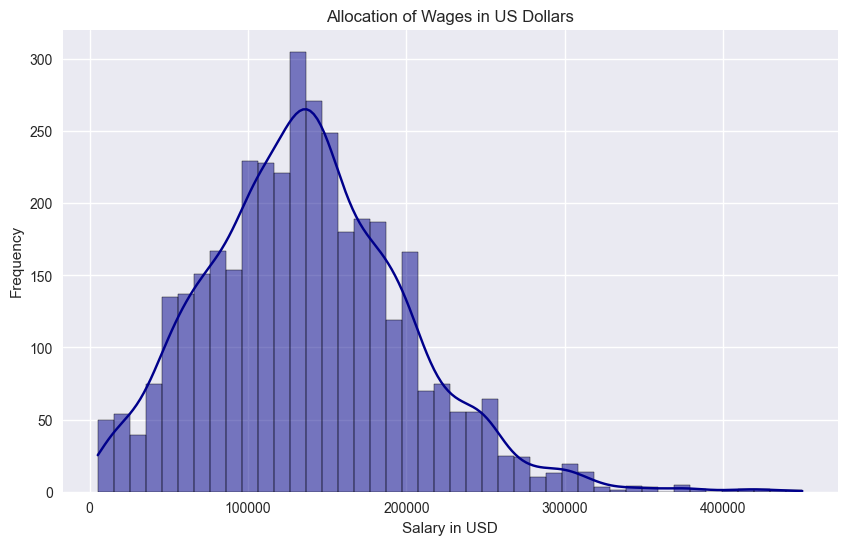

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(ds["salary_in_usd"], color="darkblue",kde=True)
plt.title("Allocation of Wages in US Dollars")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


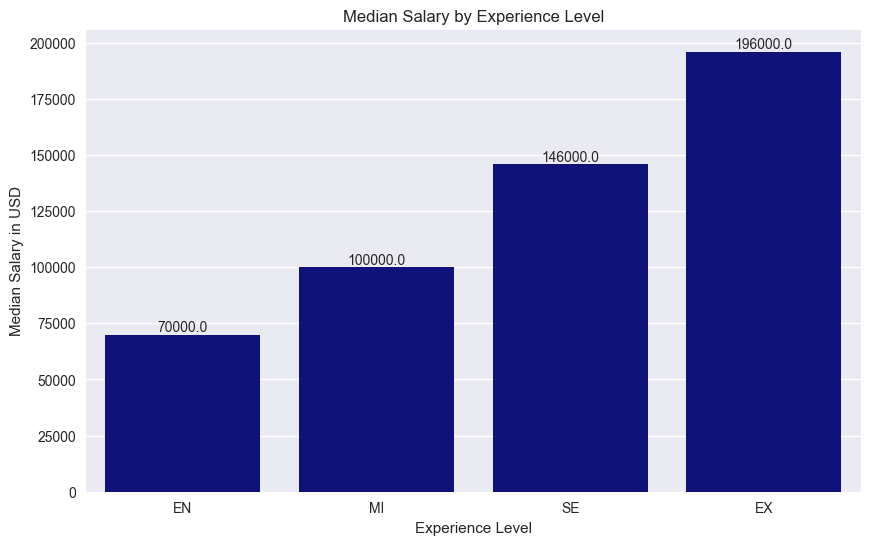

In [32]:
median_ds = ds.groupby('experience_level')['salary_in_usd'].median().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=median_ds.keys(), y=median_ds.values, color="darkblue")

# Add the values to each bar
for index, x in enumerate(median_ds.values):
    plt.text(index, x, str(x), ha='center', va='bottom')

plt.title("Median Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Median Salary in USD")
plt.show()

In [33]:
ds_remote = ds[ds["remote_ratio"] == 100]
mean_remote = np.mean(ds_remote["salary_in_usd"])
median_remote = np.median(ds_remote["salary_in_usd"])
max_remote = np.max(ds_remote["salary_in_usd"])
min_remote = np.min(ds_remote["salary_in_usd"])

ds_office = ds[ds["remote_ratio"] !=100]
mean_office = np.mean(ds_office["salary_in_usd"])
median_office = np.median(ds_office["salary_in_usd"])
max_office = np.max(ds_office["salary_in_usd"])
min_office = np.min(ds_office["salary_in_usd"])


In [34]:
ds_remote.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1643 entries, 0 to 3753
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1643 non-null   int64 
 1   experience_level    1643 non-null   object
 2   employment_type     1643 non-null   object
 3   job_title           1643 non-null   object
 4   salary              1643 non-null   int64 
 5   salary_currency     1643 non-null   object
 6   salary_in_usd       1643 non-null   int64 
 7   employee_residence  1643 non-null   object
 8   remote_ratio        1643 non-null   int64 
 9   company_location    1643 non-null   object
 10  company_size        1643 non-null   object
dtypes: int64(4), object(7)
memory usage: 154.0+ KB


In [35]:
ds_office.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2112 entries, 5 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2112 non-null   int64 
 1   experience_level    2112 non-null   object
 2   employment_type     2112 non-null   object
 3   job_title           2112 non-null   object
 4   salary              2112 non-null   int64 
 5   salary_currency     2112 non-null   object
 6   salary_in_usd       2112 non-null   int64 
 7   employee_residence  2112 non-null   object
 8   remote_ratio        2112 non-null   int64 
 9   company_location    2112 non-null   object
 10  company_size        2112 non-null   object
dtypes: int64(4), object(7)
memory usage: 198.0+ KB


In [36]:
stat_remote = ds_remote["salary_in_usd"].describe().round(2)
stat_office = ds_office["salary_in_usd"].describe().round(2)

comparing_stat = pd.DataFrame(stat_remote)
comparing_stat


,salary_in_usd
count,1643.00
mean,136481.45
std,63373.51
min,5132.00
25%,90000.00
50%,135000.00
75%,180000.00
max,416000.00


In [37]:
# Merge the DataFrames on the index
merged_df = pd.merge(stat_remote, stat_office, left_index=True, right_index=True)

# Rename the columns
merged_df.columns = ["usd_salary_remote", "usd_salary_office"]
merged_df["comparing"] = merged_df["usd_salary_remote"] - merged_df["usd_salary_office"]
merged_df.round(0)

,usd_salary_remote,usd_salary_office,comparing
count,1643.0,2112.0,-469.0
mean,136481.0,138418.0,-1936.0
std,63374.0,62809.0,564.0
min,5132.0,5409.0,-277.0
25%,90000.0,99926.0,-9926.0
50%,135000.0,133816.0,1184.0
75%,180000.0,175000.0,5000.0
max,416000.0,450000.0,-34000.0


In [38]:
stat_remote["50%"]

135000.0

In [39]:
print(f"the distribution of remote worker " + str(ds_remote.shape[0]))

the distribution of remote worker 1643


In [40]:
data = {
    'Metric': ['Mean', 'Median', 'Max', 'Min'],
    'Remote': [mean_remote, median_remote, max_remote, min_remote],
    'Office': [mean_office, median_office, max_office, min_office]
}

# Create a DataFrame
comparison_df = pd.DataFrame(data).round(2)

# Set the 'Metric' column as the index
comparison_df.set_index('Metric', inplace=True)

# Correct the column name to "Office"
comparison_df["Comparison"] = (comparison_df["Remote"] - comparison_df["Office"])
comparison_df["Sign"] = np.where(comparison_df["Comparison"] >= 0, "positive", "negative")

# Display the DataFrame
print(comparison_df)


           Remote     Office  Comparison      Sign
Metric                                            
Mean    136481.45  138417.51    -1936.06  negative
Median  135000.00  133816.00     1184.00  positive
Max     416000.00  450000.00   -34000.00  negative
Min       5132.00    5409.00     -277.00  negative


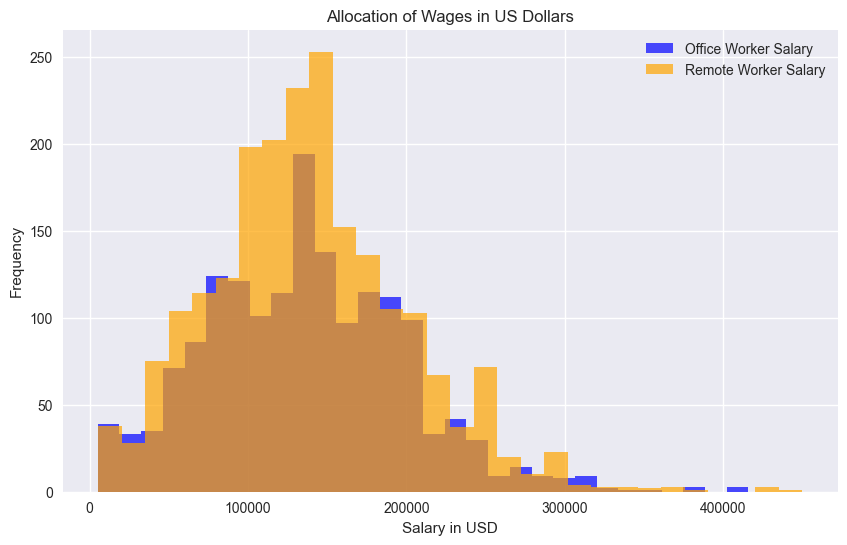

In [41]:
plt.figure(figsize=(10,6))

# Plot the histogram for df_onsite
plt.hist(ds_remote["salary_in_usd"], bins=30, color="blue", alpha=0.7, label="Office Worker Salary")

# Plot the histogram for df_new
plt.hist(ds_office["salary_in_usd"], bins=30, color="orange", alpha=0.7, label="Remote Worker Salary")

plt.style.use("seaborn-v0_8")
plt.title("Allocation of Wages in US Dollars")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.legend()
plt.show()

experience_level
EN     60000.0
EX    210914.0
MI     90000.0
SE    150000.0
Name: salary_in_usd, dtype: float64
experience_level
EN     82264.0
EX    175050.0
MI    104663.0
SE    145000.0
Name: salary_in_usd, dtype: float64


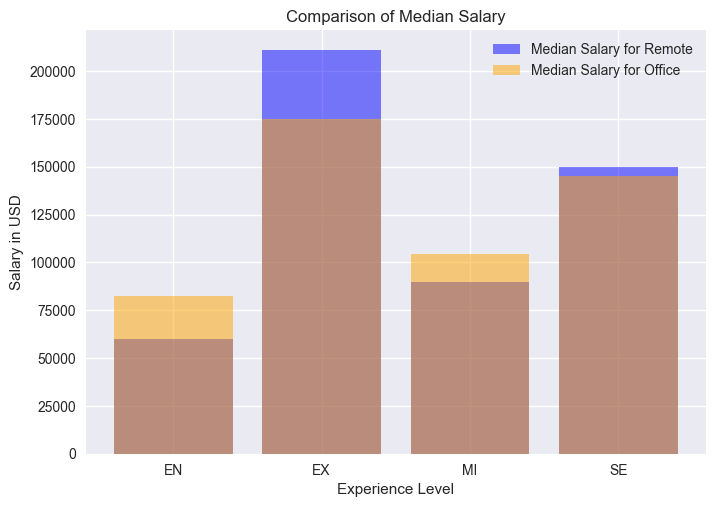

In [42]:
# Assuming you have already defined the dataframes ds_remote and ds_office
median_salary_remote = ds_remote.groupby("experience_level")["salary_in_usd"].median()
median_salary_office = ds_office.groupby("experience_level")["salary_in_usd"].median()
print(median_salary_remote)
print(median_salary_office)



plt.bar(median_salary_remote.index, median_salary_remote, alpha=0.5, color="blue", label="Median Salary for Remote")
plt.bar(median_salary_office.index, median_salary_office, alpha=0.5, color="orange", label="Median Salary for Office")

plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Comparison of Median Salary')
plt.legend()
plt.show()

In [43]:
df_remote = pd.DataFrame({'experience_level': median_salary_remote.index, 'median_salary_remote': median_salary_remote.values})
df_office = pd.DataFrame({'experience_level': median_salary_office.index, 'median_salary_office': median_salary_office.values})

# Merge DataFrames on 'experience_level'
result_df = pd.merge(df_remote, df_office, on='experience_level')
result_df["comparing_median"] = result_df["median_salary_remote"] - result_df["median_salary_office"]



In [44]:
result_df

,experience_level,median_salary_remote,median_salary_office,comparing_median
0,EN,60000.0,82264.0,-22264.0
1,EX,210914.0,175050.0,35864.0
2,MI,90000.0,104663.0,-14663.0
3,SE,150000.0,145000.0,5000.0


In [45]:
# Assuming you have already defined the dataframes ds_remote and ds_office
mean_salary_remote = ds_remote.groupby("experience_level")["salary_in_usd"].mean()
mean_salary_office = ds_office.groupby("experience_level")["salary_in_usd"].mean()

plt.bar(experience_levels, mean_salary_remote, alpha=0.5, color="blue", label="Mean Salary for Remote")
plt.bar(experience_levels, mean_salary_office, alpha=0.5, color="orange", label="Mean Salary for Office")

plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Comparison of Median Salary')
plt.legend()
plt.show()

NameError: name 'experience_levels' is not defined

In [46]:
EN_remote = ds_remote[ds_remote["experience_level"] == "EN"]
top_EN_remote = EN_remote.sort_values(by="salary_in_usd", ascending= False).head()
bot_EN_remote = EN_remote.sort_values(by="salary_in_usd", ascending=False).tail()

MI_remote = ds_remote[ds_remote["experience_level"] == "MI"]
top_MI_remote = MI_remote.sort_values(by="salary_in_usd", ascending=False).head()
bot_MI_remote = MI_remote.sort_values(by="salary_in_usd", ascending=False).tail()

SE_remote = ds_remote[ds_remote["experience_level"] == "SE"]
top_SE_remote = SE_remote.sort_values(by="salary_in_usd", ascending=False).head()
bot_SE_remote = SE_remote.sort_values(by="salary_in_usd", ascending=False).tail()

EX_remote = ds_remote[ds_remote["experience_level"] == "EX"]
top_EX_remote = EX_remote.sort_values(by="salary_in_usd", ascending=False).head()
bot_EX_remote = EX_remote.sort_values(by="salary_in_usd", ascending=False).tail()


In [47]:
EN_office = ds_office[ds_office["experience_level"] == "EN"]
top_EN_office = EN_office.sort_values(by="salary_in_usd", ascending=False).head()
bot_EN_office = EN_office.sort_values(by="salary_in_usd", ascending=False).tail()

MI_office = ds_office[ds_office["experience_level"] == "MI"]
top_MI_office = MI_office.sort_values(by="salary_in_usd", ascending=False).head()
bot_MI_office = MI_office.sort_values(by="salary_in_usd", ascending=False).tail()

SE_office = ds_office[ds_office["experience_level"] == "SE"]
top_SE_office = SE_office.sort_values(by="salary_in_usd", ascending=False).head()
bot_SE_office = SE_office.sort_values(by="salary_in_usd", ascending=False).tail()


EX_office = ds_office[ds_office["experience_level"] == "EX"]
top_EX_office = EX_office.sort_values(by="salary_in_usd", ascending=False).head()
bot_EX_office = EX_office.sort_values(by="salary_in_usd", ascending=False).tail()



In [48]:
print(np.mean(ds_remote["salary_in_usd"]))
print(np.median(ds_remote["salary_in_usd"]))

136481.45283018867
135000.0


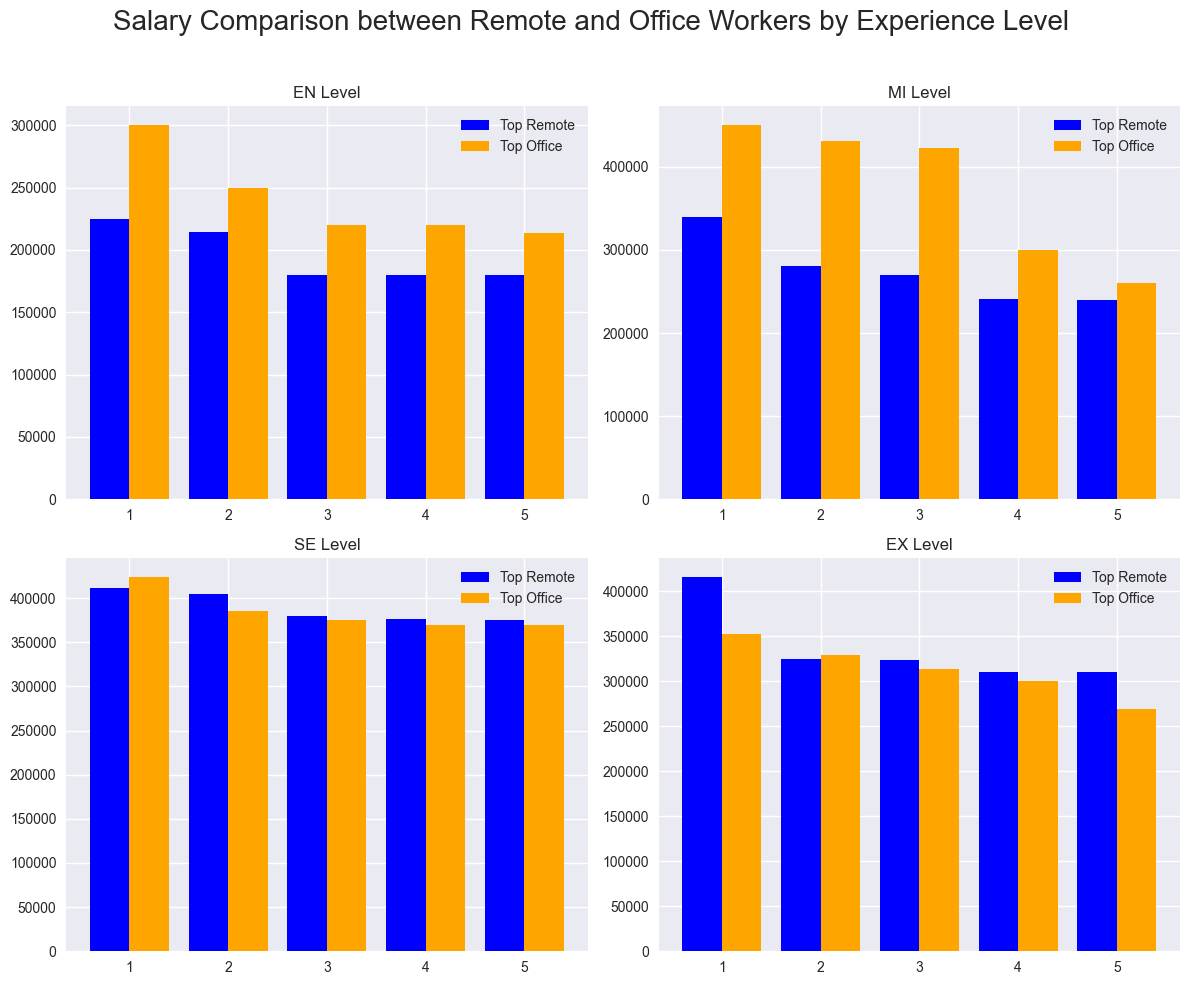

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the dataframes and top/bottom salary dataframes defined as in your code

# Create bar plots for each experience level
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Salary Comparison between Remote and Office Workers by Experience Level ', fontsize=20)

# Define the positions for the bars
positions = np.arange(1, 6)

# EN level
axes[0, 0].bar(positions - 0.2, top_EN_remote['salary_in_usd'], width=0.4, label='Top Remote', color='blue')
axes[0, 0].bar(positions + 0.2, top_EN_office['salary_in_usd'], width=0.4, label='Top Office', color='orange')
axes[0, 0].set_title('EN Level')
axes[0, 0].set_xticks(positions)
axes[0, 0].legend()

# MI level
axes[0, 1].bar(positions - 0.2, top_MI_remote['salary_in_usd'], width=0.4, label='Top Remote', color='blue')
axes[0, 1].bar(positions + 0.2, top_MI_office['salary_in_usd'], width=0.4, label='Top Office', color='orange')
axes[0, 1].set_title('MI Level')
axes[0, 1].set_xticks(positions)
axes[0, 1].legend()

# SE level
axes[1, 0].bar(positions - 0.2, top_SE_remote['salary_in_usd'], width=0.4, label='Top Remote', color='blue')
axes[1, 0].bar(positions + 0.2, top_SE_office['salary_in_usd'], width=0.4, label='Top Office', color='orange')
axes[1, 0].set_title('SE Level')
axes[1, 0].set_xticks(positions)
axes[1, 0].legend()

# EX level
axes[1, 1].bar(positions - 0.2, top_EX_remote['salary_in_usd'], width=0.4, label='Top Remote', color='blue')
axes[1, 1].bar(positions + 0.2, top_EX_office['salary_in_usd'], width=0.4, label='Top Office', color='orange')
axes[1, 1].set_title('EX Level')
axes[1, 1].set_xticks(positions)
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


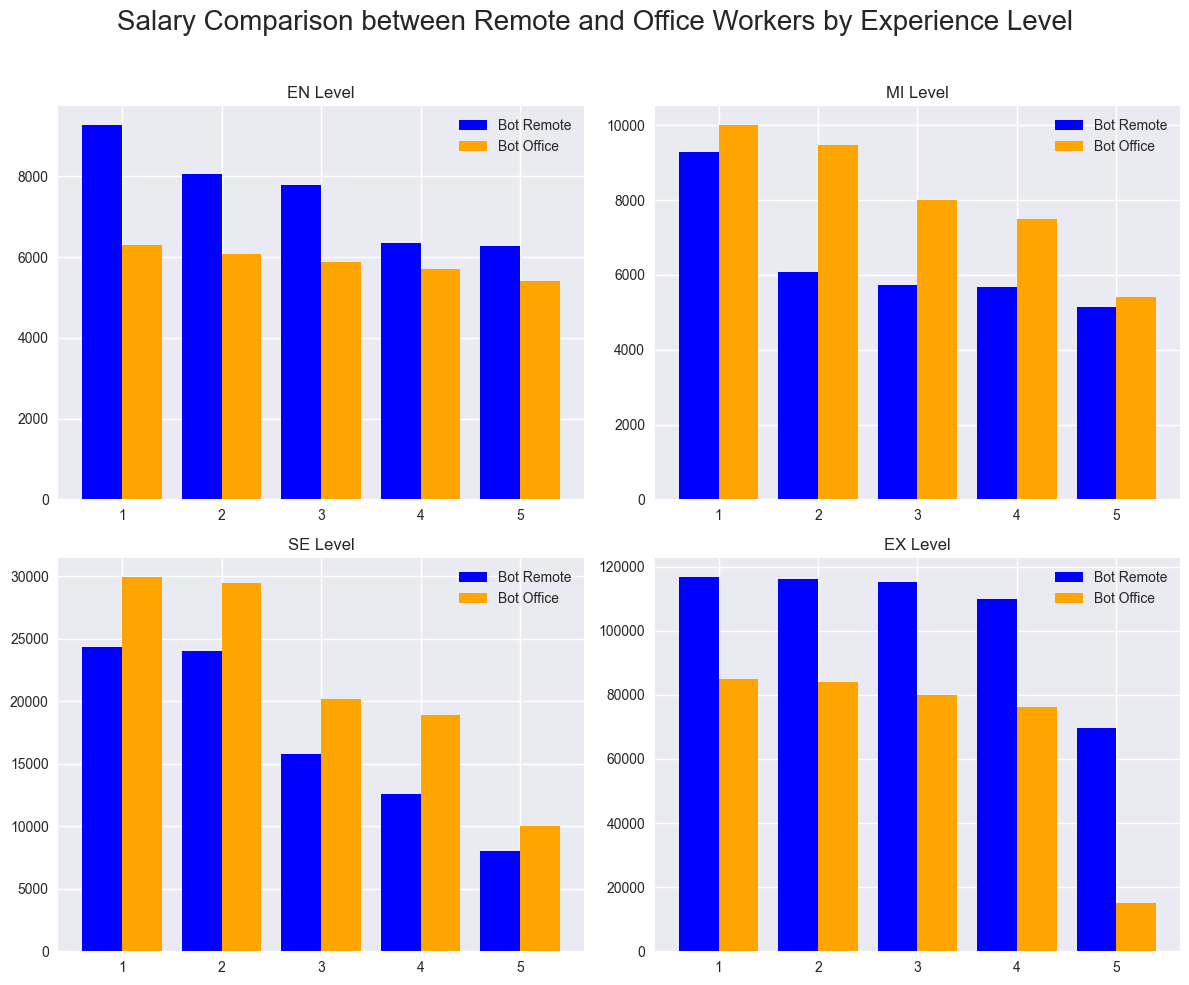

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the dataframes and top/bottom salary dataframes defined as in your code

# Create bar plots for each experience level
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Salary Comparison between Remote and Office Workers by Experience Level', fontsize=20)

# Define the positions for the bars
positions = np.arange(1, 6)

# EN level
axes[0, 0].bar(positions - 0.2, bot_EN_remote['salary_in_usd'], width=0.4, label='Bot Remote', color='blue')
axes[0, 0].bar(positions + 0.2, bot_EN_office['salary_in_usd'], width=0.4, label='Bot Office', color='orange')
axes[0, 0].set_title('EN Level')
axes[0, 0].set_xticks(positions)
axes[0, 0].legend()

# MI level
axes[0, 1].bar(positions - 0.2, bot_MI_remote['salary_in_usd'], width=0.4, label='Bot Remote', color='blue')
axes[0, 1].bar(positions + 0.2, bot_MI_office['salary_in_usd'], width=0.4, label='Bot Office', color='orange')
axes[0, 1].set_title('MI Level')
axes[0, 1].set_xticks(positions)
axes[0, 1].legend()

# SE level
axes[1, 0].bar(positions - 0.2, bot_SE_remote['salary_in_usd'], width=0.4, label='Bot Remote', color='blue')
axes[1, 0].bar(positions + 0.2, bot_SE_office['salary_in_usd'], width=0.4, label='Bot Office', color='orange')
axes[1, 0].set_title('SE Level')
axes[1, 0].set_xticks(positions)
axes[1, 0].legend()

# EX level
axes[1, 1].bar(positions - 0.2, bot_EX_remote['salary_in_usd'], width=0.4, label='Bot Remote', color='blue')
axes[1, 1].bar(positions + 0.2, bot_EX_office['salary_in_usd'], width=0.4, label='Bot Office', color='orange')
axes[1, 1].set_title('EX Level')
axes[1, 1].set_xticks(positions)
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [ ]:
import pandas as pd

# Assuming you have the dataframes and top/bottom salary dataframes defined as in your code

# Extract relevant columns for the new DataFrame
columns_to_keep = ['experience_level', 'salary_in_usd']
remote_data = pd.concat([top_EN_remote, top_MI_remote, top_SE_remote, top_EX_remote])
office_data = pd.concat([top_EN_office, top_MI_office, top_SE_office, top_EX_office])

# Create new Dataframes for top salaries
top_new_data = pd.DataFrame({
    'experience_level': remote_data['experience_level'].values,
    'salary_in_usd_remote': remote_data['salary_in_usd'].values,
    'salary_in_usd_office': office_data['salary_in_usd'].values,
    'salary_difference': (remote_data['salary_in_usd'].values - office_data['salary_in_usd'].values)
})

# Extract relevant columns for the new DataFrames
bot_remote_data = pd.concat([bot_EN_remote, bot_MI_remote, bot_SE_remote, bot_EX_remote])
bot_office_data = pd.concat([bot_EN_office, bot_MI_office, bot_SE_office, bot_EX_office])

# Create new DataFrames for bottom salaries
bot_new_data = pd.DataFrame({
    'experience_level': bot_remote_data['experience_level'].values,
    'salary_in_usd_remote': bot_remote_data['salary_in_usd'].values,
    'salary_in_usd_office': bot_office_data['salary_in_usd'].values,
    'salary_difference': (bot_remote_data['salary_in_usd'].values - bot_office_data['salary_in_usd'].values)
})

# Display the new DataFrame
print(top_new_data)
print(bot_new_data)

   experience_level  salary_in_usd_remote  salary_in_usd_office  \
0                EN                225000                300000   
1                EN                214618                250000   
2                EN                180000                220000   
3                EN                180000                220000   
4                EN                180000                213660   
5                MI                340000                450000   
6                MI                280700                430967   
7                MI                270000                423000   
8                MI                241000                300000   
9                MI                240000                260000   
10               SE                412000                423834   
11               SE                405000                385000   
12               SE                380000                375000   
13               SE                376080                37000

In [ ]:
top_new_data

,experience_level,salary_in_usd_remote,salary_in_usd_office,salary_difference
0,EN,225000,300000,-75000
1,EN,214618,250000,-35382
2,EN,180000,220000,-40000
3,EN,180000,220000,-40000
4,EN,180000,213660,-33660
5,MI,340000,450000,-110000
6,MI,280700,430967,-150267
7,MI,270000,423000,-153000
8,MI,241000,300000,-59000
9,MI,240000,260000,-20000


In [ ]:
import pandas as pd

# Assuming you have the dataframes and top/bottom salary dataframes defined as in your code

# Extract relevant columns for the new DataFrames
columns_to_keep = ['work_year', 'experience_level', 'salary_in_usd']
bot_remote_data = pd.concat([bot_EN_remote, bot_MI_remote, bot_SE_remote, bot_EX_remote])
bot_office_data = pd.concat([bot_EN_office, bot_MI_office, bot_SE_office, bot_EX_office])

# Create new DataFrames for bottom salaries
bot_new_data = pd.DataFrame({
    'experience_level': bot_remote_data['experience_level'].values,
    'salary_in_usd_remote': bot_remote_data['salary_in_usd'].values,
    'salary_in_usd_office': bot_office_data['salary_in_usd'].values,
    'salary_difference': (bot_remote_data['salary_in_usd'].values - bot_office_data['salary_in_usd'].values)
})

# Display the new DataFrames
print("Top Salaries:")
print(new_data)

print("\nBottom Salaries:")
print(bot_new_data)


Top Salaries:
   experience_level  salary_in_usd_remote  salary_in_usd_office  \
0                EN                225000                300000   
1                EN                214618                250000   
2                EN                180000                220000   
3                EN                180000                220000   
4                EN                180000                213660   
5                MI                340000                450000   
6                MI                280700                430967   
7                MI                270000                423000   
8                MI                241000                300000   
9                MI                240000                260000   
10               SE                412000                423834   
11               SE                405000                385000   
12               SE                380000                375000   
13               SE                376080       

In [ ]:
bot_new_data

,experience_level,salary_in_usd_remote,salary_in_usd_office,salary_difference
0,EN,9272,6304,2968
1,EN,8050,6072,1978
2,EN,7799,5882,1917
3,EN,6359,5707,652
4,EN,6270,5409,861
5,MI,9289,10000,-711
6,MI,6072,9466,-3394
7,MI,5723,8000,-2277
8,MI,5679,7500,-1821
9,MI,5132,5409,-277


In [ ]:
corr_both_employee = np.corrcoef(ds["salary_in_usd"], ds["remote_ratio"])
corr_both_employee

array([[ 1.        , -0.06417099],
       [-0.06417099,  1.        ]])

In [ ]:
correlation_by_level = ds.groupby('experience_level')['salary_in_usd', 'remote_ratio'].corr().iloc[0::2,-1]

# Combine the results into a DataFrame
correlation_by_level_df = pd.DataFrame({
    'correlation_salary_remote_ratio': correlation_by_level
})

# Display the correlation by level DataFrame
print(correlation_by_level_df)


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
import pandas as pd

# Assuming you have ds_salary DataFrame

# Group by experience level and calculate correlation with remote ratio
correlation_by_level = ds.groupby('experience_level')[['salary_in_usd', 'remote_ratio']].corr().iloc[0::2, -1]

# Combine the results into a DataFrame
correlation_by_level_df = pd.DataFrame({
    'correlation_salary_remote_ratio': correlation_by_level
})

# Display the correlation by level DataFrame
correlation_by_level_df


,,correlation_salary_remote_ratio
experience_level,,
EN,salary_in_usd,-0.326773
EX,salary_in_usd,0.222388
MI,salary_in_usd,-0.178453
SE,salary_in_usd,-0.001725


In [ ]:
correlation_in_ds = ds["salary_in_usd"].corr(ds["remote_ratio"])
correlation_in_ds

-0.06417098519057557

In [ ]:
import pandas as pd

# Assuming you have ds_salary DataFrame

# Group by experience level and calculate correlation with remote ratio
correlations_by_levels = ds.groupby('experience_level')[['salary_in_usd', 'remote_ratio']].corr()

# Combine the results into a DataFrame
correlations_by_level_df = pd.DataFrame({
    'correlation_salary_remote_ratio': correlations_by_levels['remote_ratio']
})

# Display the correlation by level DataFrame
print(correlations_by_level_df)


                                correlation_salary_remote_ratio
experience_level                                               
EN               salary_in_usd                        -0.326773
                 remote_ratio                          1.000000
EX               salary_in_usd                         0.222388
                 remote_ratio                          1.000000
MI               salary_in_usd                        -0.178453
                 remote_ratio                          1.000000
SE               salary_in_usd                        -0.001725
                 remote_ratio                          1.000000
